In [1]:
import os.path
import sys
sys.path.append('/Users/cmagri1/OneDrive - Johns Hopkins/git')
from torch import nn
import torch
from torchvision.models.alexnet import alexnet
from tqdm import tqdm

from EncodingModel_cm296 import utils as emutils
from EncodingModel_cm296 import feature_extractor as emfe

import pandas as pd
import numpy as np
import csv




In [2]:
#Load word2sense
#already preprocessed in MATLAB so that Wrd2Sns and THINGs overlap --> we have IMAGES, LABELS and SENSES
pathtofile = '../code-00-preprocessdataset/'
PathToImgs = 'img-test'

In [3]:
#Compute DNN features
def object_by_feature(PathToImgs,keyword,ilayer,resolutionval,WordInf=[],pretrained=True):

    print('Computing '+ keyword+ ' stimuli features for ' + ilayer)
    #Specify the model
    model = emfe.AlexNet(ilayer,pretrained_val=pretrained);      
    condition_features = emutils.compute_features(model, PathToImgs,resolutionval,WordInf)
    return condition_features

In [4]:

keyword = 'test'
ilayer = 'conv_5'
resolutionval= 224
object2vec_features = object_by_feature(PathToImgs,keyword,ilayer,resolutionval)


Computing test stimuli features for conv_5


100%|██████████| 2/2 [00:00<00:00, 13.86it/s]


In [5]:
object2vec_features['acorn'].shape

(9216,)

In [6]:
from torch import nn
from torchvision.models.alexnet import alexnet

In [7]:
base = alexnet(pretrained=True)
base.features[10:]

Sequential(
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [8]:
conv_5 = base.features[10:]

In [9]:
base = alexnet(pretrained=True)
base.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [10]:
class AlexNetConv5(nn.Module):
    def __init__(self):
        super().__init__()

        base = alexnet(pretrained=True)
        self.conv = base.features
        self.conv1 = base.features[:2]
        self.avgpool = base.avgpool
        
        self.eval()

    def forward(self, stimuli):
        x = self.conv(stimuli) #shape: [stim, 256, 7, 7] / mean test set r = 0.7297
        #x = self.avgpool(x) #shape: [stim, 256, 6, 6]
        x = x.view(x.size(0), -1) #shape: [stim, 12544] / mean test set r =  0.7218
        #x = self.fc_6(x) #shape: [stim, 4096] / mean test set r = 0.7142
        return x

In [11]:
#Load word2sense
#already preprocessed in MATLAB so that Wrd2Sns and THINGs overlap --> we have IMAGES, LABELS and SENSES
savepath = '../../../data-00/'

#Parameters
pretrainedModel = False
resolutionval = 227;


layer = 'conv_5';
# ROI = {'EVC','LOC'}
ROI = 'EVC'
Sub = 1

In [12]:
import scipy.spatial as sp
import seaborn as sns



In [13]:
w = np.load(savepath + 'Weights_Sub' + str(Sub) + '_' + ROI + "_" + layer + '.npy')
w_r = np.load(savepath + '/Weights_Sub' + str(Sub) + '_' + ROI + "_" + layer + '_random.npy')

In [14]:
results2 = 1 - sp.distance.cdist(w.transpose()[:1000,:], w_r.transpose()[:1000,:], 'correlation')


In [ ]:
sns.heatmap(results2, center=0)
# sns.heatmap(results2, center=0)

In [15]:
x = list(range(0,results2.shape[0]))
y = results2.diagonal()

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x, y)


In [ ]:
w.shape
w_sub = w[1:4,:]

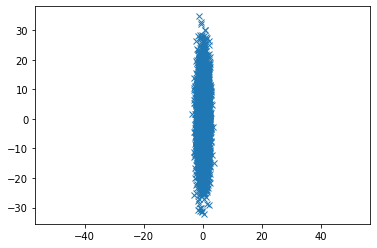

In [17]:
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [18]:
np.random.multivariate_normal(mean, cov, 5000).shape

(5000, 2)

In [ ]:
_mean = np.mean(w_sub, axis=0)
_cov = np.cov(w_sub, rowvar=False)


In [ ]:
_mean.shape

In [ ]:
_cov.shape

In [ ]:
predictor_variable_sub_random = np.random.multivariate_normal(_mean, _cov, (w_sub.shape[0]))


In [ ]:
predictor_variable_sub_random.shape

In [28]:
mean = (1, 2)
cov = [[1, 1], [1, 1]]
x = np.random.multivariate_normal(mean, cov, 2)
x.shape

(2, 2)

In [29]:
x

array([[0.30911272, 1.30911272],
       [2.80101587, 3.80101587]])

In [30]:
cov

[[1, 1], [1, 1]]